In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
# Loading the dataset
df = pd.read_csv('/Spam_SMS_Collection.txt', delimiter='\t', header=None, names=['label', 'message'])


In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


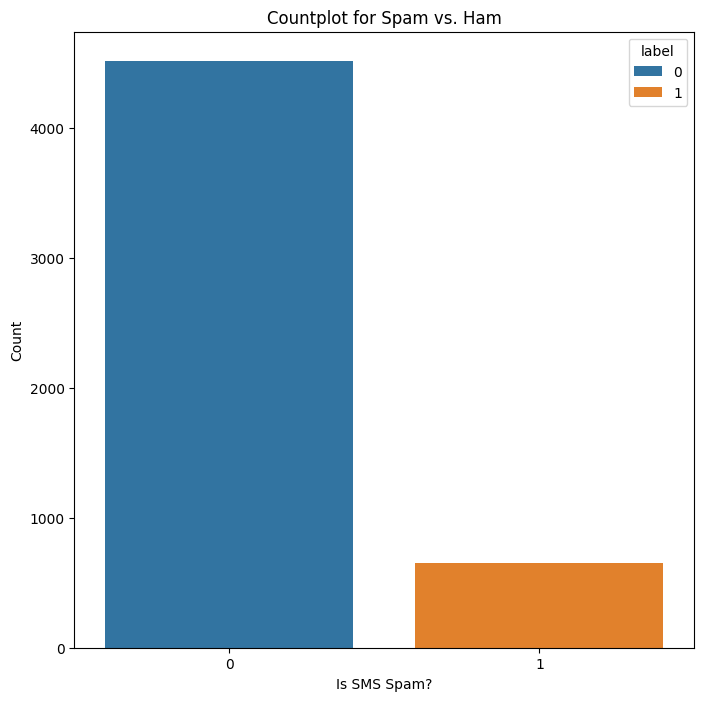

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='label', data=df, hue='label')
plt.title('Countplot for Spam vs. Ham')
plt.xlabel('Is SMS Spam?')
plt.ylabel('Count')
plt.show()

###  *Insight:* From the above countplot, it is evident that the dataset is **imbalanced**.

## **Feature Engineering**
*   Handling imbalanced dataset using Oversampling
*   Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.


In [ ]:
# Handling imbalanced dataset using Oversampling
spam = df[df['label']==1]
ham =  df[df['label']==0]
print('Number of Spam records: {}'.format(spam.shape[0]))
print('Number of Ham records: {}'.format(ham.shape[0]))

Number of Spam records: 653
Number of Ham records: 4516


In [ ]:
count = int(ham.shape[0]-spam.shape[0])

for i in range(0, count):
    record = pd.DataFrame(spam.sample(n=1))
    df = pd.concat([df, record])


In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
1573,1,Ur cash-balance is currently 500 pounds - to m...
1521,1,"URGENT! Your Mobile No was awarded a £2,000 Bo..."
518,1,Your credits have been topped up for http://ww...
5137,1,YOU VE WON! Your 4* Costa Del Sol Holiday or £...


In [ ]:
df['label'].value_counts()

,count
label,
0,4516
1,4516


In [ ]:
#Creating new feature 'word_count'
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


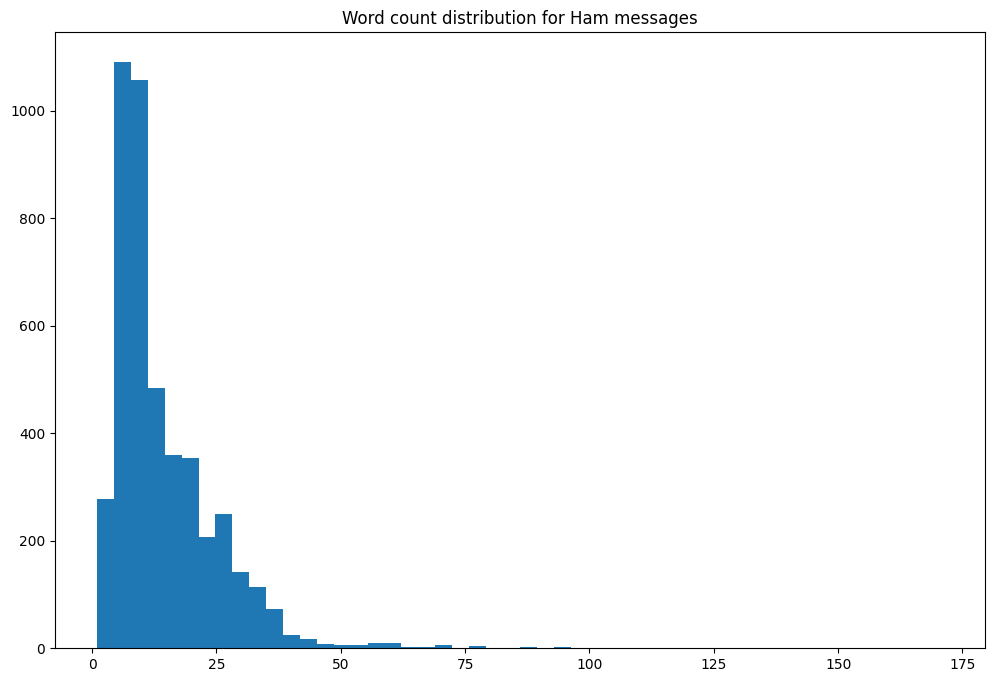

In [ ]:
plt.figure(figsize=(12, 8))
df1 = df[df['label']==0]
plt.hist(df1['word_count'], bins=50, label='Ham')
plt.title('Word count distribution for Ham messages')
plt.show()

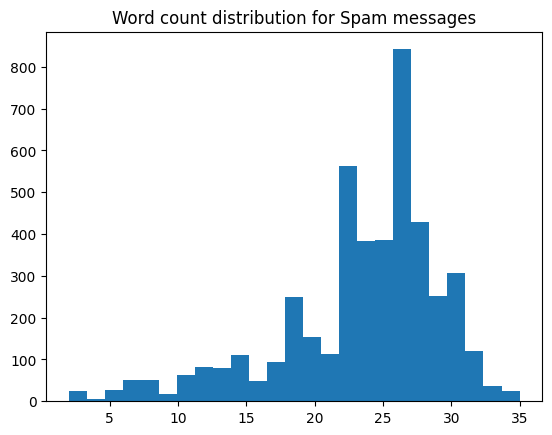

In [ ]:
df2 = df[df['label']==1]
plt.hist(df2['word_count'], bins=25, label='Spam')
plt.title('Word count distribution for Spam messages')
plt.show()


_**Insight:** **Spam messages** word_count fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words**._

In [ ]:
# Creating feature 'contains_currency_symbol'
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
    return 0

df['contains_currency_symbol'] = df['message'].apply(currency)


In [ ]:
df

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
1573,1,Ur cash-balance is currently 500 pounds - to m...,22,0
1521,1,"URGENT! Your Mobile No was awarded a £2,000 Bo...",27,1
518,1,Your credits have been topped up for http://ww...,13,0
5137,1,YOU VE WON! Your 4* Costa Del Sol Holiday or £...,25,1


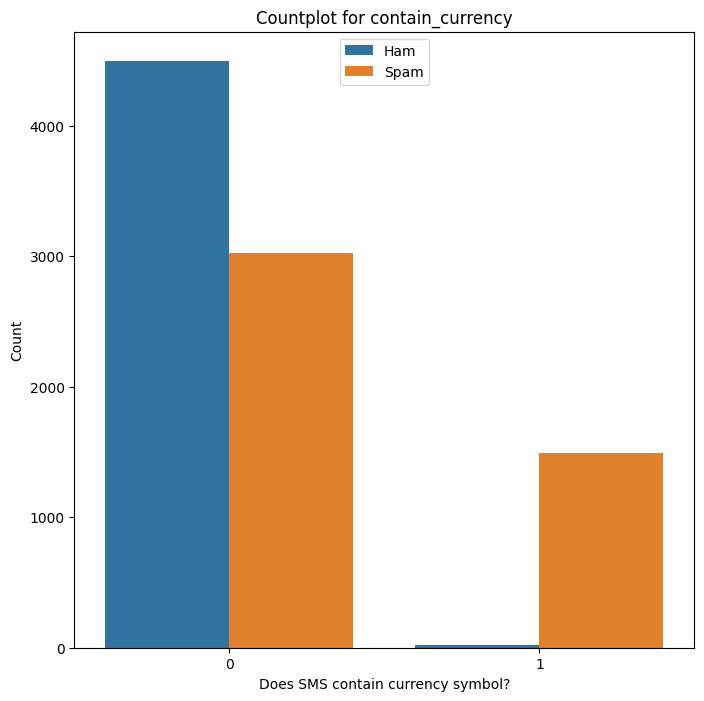

In [ ]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
sns.countplot(x='contains_currency_symbol', data=df, hue='label')
plt.title('Countplot for contain_currency')
plt.xlabel('Does SMS contain currency symbol?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)
plt.show()

_**Insight: Almost 1/3 of Spam messages contain currency symbols**, and currency symbols are **rarely used in Ham messages.**_

In [ ]:
# Creating feature 'contains_number'
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

df['contains_number'] = df['message'].apply(numbers)

In [ ]:
df

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
1573,1,Ur cash-balance is currently 500 pounds - to m...,22,0,1
1521,1,"URGENT! Your Mobile No was awarded a £2,000 Bo...",27,1,1
518,1,Your credits have been topped up for http://ww...,13,0,0
5137,1,YOU VE WON! Your 4* Costa Del Sol Holiday or £...,25,1,1


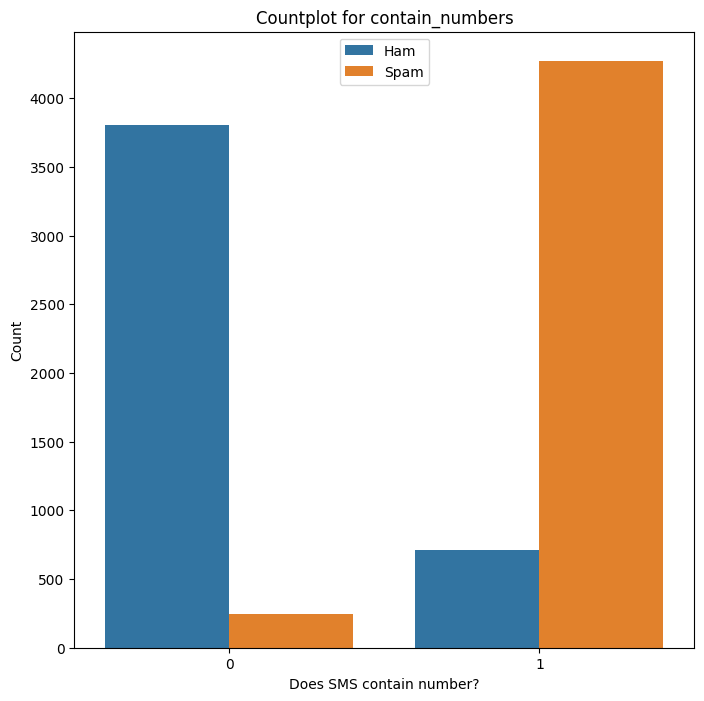

In [ ]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
sns.countplot(x='contains_number', data=df, hue='label')
plt.title('Countplot for contain_numbers')
plt.xlabel('Does SMS contain number?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)
plt.show()

_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

## Text Preprocessing
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [ ]:
# Importing essential libraries for performing NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [ ]:
corpus[0:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

Model Building & Evaluation
_**Metric: F1-Score**_

* Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.979 ---
Standard Deviation: 0.004


In [ ]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       899
           1       0.96      0.99      0.98       908

    accuracy                           0.97      1807
   macro avg       0.98      0.97      0.97      1807
weighted avg       0.98      0.97      0.97      1807



## Making Predictions

In [ ]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return dt.predict(temp)

In [ ]:
# Prediction 1
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 2
sample_message = 'Hey Sam, How are you ?'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 3
sample_message = 'Get 1000$ by clicking on the link given below https://abcxyz.com'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


Gotcha! This is a SPAM message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 4
sample_message = 'Satish, please give me 1000$'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 5
sample_message = 'Harsh, your google account is in danger, please protect using 2 way authentication'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
